Here are the steps to k-means clustering:
1. Define the k centroids- Initialize these at random.
2. Find the closest centroid & update cluster assignments- Assign each data point to one of the k clusters. Each data point is assigned to the nearest centroid’s cluster. Here, the measure of “nearness” is a hyperparameter — often Euclidean distance.
3. Move the centroids to the center of their clusters- The new position of each centroid is calculated as the average position of all the points in its cluster.
Keep repeating steps 2 and 3 until the centroid stop moving a lot at each iteration (i.e., until the algorithm converges).

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import urllib.request

In [4]:
# read training and test data from the url link and save the file to your working directory
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"

urllib.request.urlretrieve(url, "E:/pg/bpb/BPB-Publications/Datasets/unsupervised/poker_train.csv")

url2 = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data"

urllib.request.urlretrieve(url2, "E:/pg/bpb/BPB-Publications/Datasets/unsupervised/poker_test.csv")

# read the data in and add column names
data_train = pd.read_csv("E:/pg/bpb/BPB-Publications/Datasets/unsupervised/poker_train.csv", header=None,
                        names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])

data_test = pd.read_csv("E:/pg/bpb/BPB-Publications/Datasets/unsupervised/poker_test.csv", header=None,
                        names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])

In [5]:
data_train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [6]:
data_train.dtypes

S1       int64
C1       int64
S2       int64
C2       int64
S3       int64
C3       int64
S4       int64
C4       int64
S5       int64
C5       int64
CLASS    int64
dtype: object

In [7]:
data_train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [8]:
# subset clustering variables
cluster=data_train[['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5']]

In [9]:
from sklearn import preprocessing
# standardize clustering variables to have mean=0 and sd=1 so that card suit and
# rank are on the same scale as to have the variables equally contribute to the analysis
clustervar = cluster.copy() # create a copy
clustervar['S1']=preprocessing.scale(clustervar['S1'].astype('float64'))
clustervar['C1']=preprocessing.scale(clustervar['C1'].astype('float64'))
clustervar['S2']=preprocessing.scale(clustervar['S2'].astype('float64'))
clustervar['C2']=preprocessing.scale(clustervar['C2'].astype('float64'))
clustervar['S3']=preprocessing.scale(clustervar['S3'].astype('float64'))
clustervar['C3']=preprocessing.scale(clustervar['C3'].astype('float64'))
clustervar['S4']=preprocessing.scale(clustervar['S4'].astype('float64'))
clustervar['C4']=preprocessing.scale(clustervar['C4'].astype('float64'))
clustervar['S5']=preprocessing.scale(clustervar['S5'].astype('float64'))
clustervar['C5']=preprocessing.scale(clustervar['C5'].astype('float64'))

# The data has been already split data into train and test sets
clus_train = clustervar

In [10]:
from sklearn.cluster import KMeans

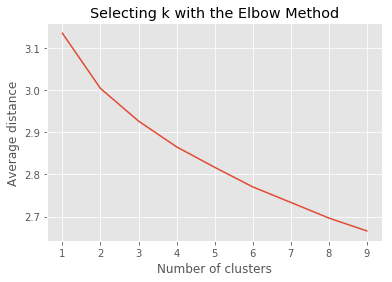

In [11]:
# k-means cluster analysis for 1-10 clusters due to the 10 possible class outcomes for poker hands                                                       
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))
    / clus_train.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') # pick the fewest number of clusters that reduces the average distance

In [12]:
plt.show()

In [13]:
# Print cluster labels of clus_train
print(clusassign)

[4 4 4 ..., 6 0 6]


In [14]:
# Let's try few variations of Hierarchical clustering for IRIS Dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris = iris.data[:, :4]
print(iris[:4])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]]


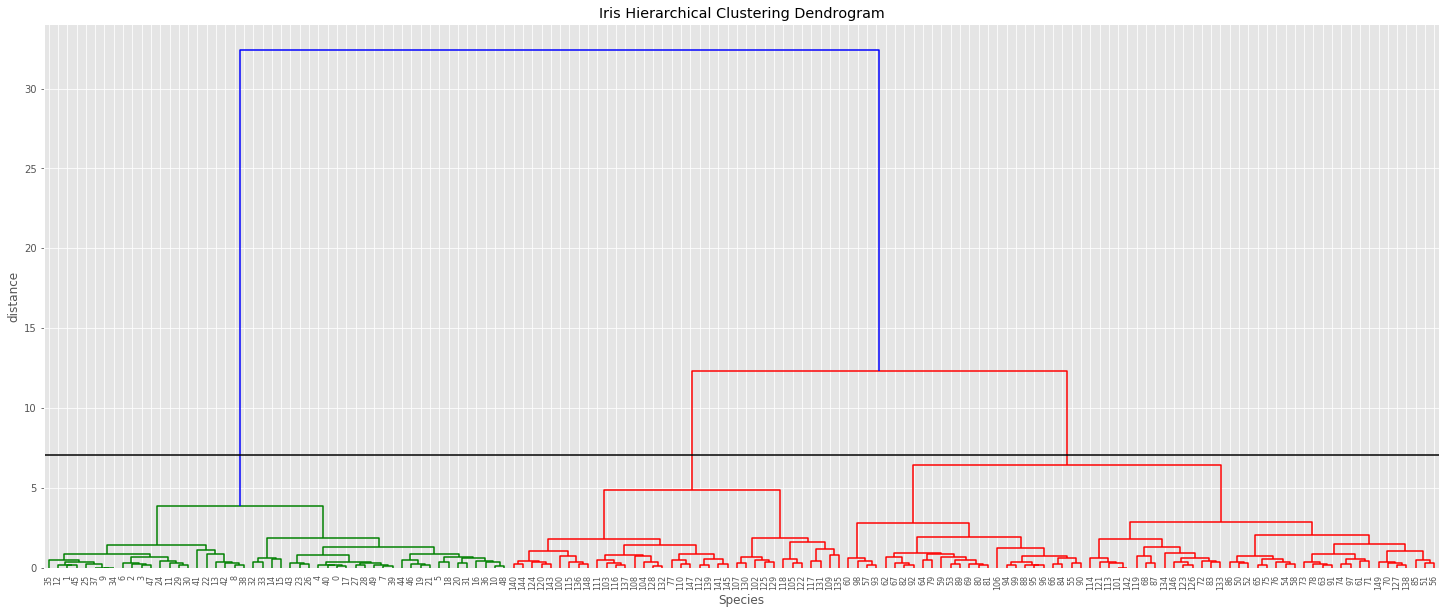

In [15]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
# generate the linkage matrix
Z = linkage(iris, 'ward')
# set cut-off to 50
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [16]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


In [17]:
#convert the matrix and vector to a Pandas DataFrame
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [18]:
rndperm = np.random.permutation(df.shape[0])

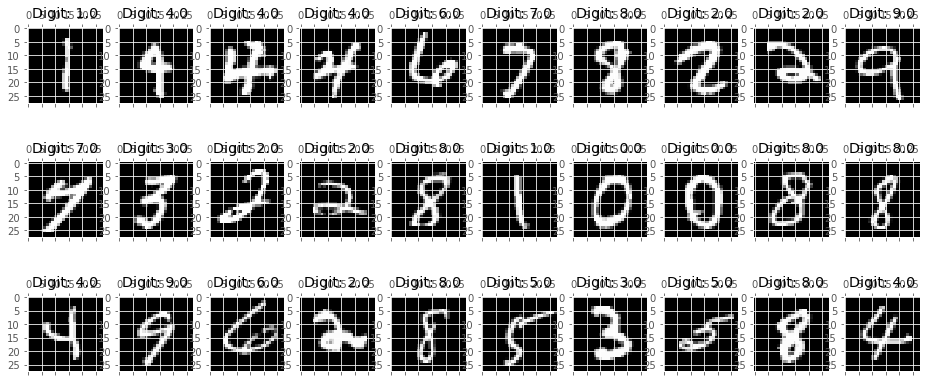

In [19]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [20]:
import time
from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.469s...
[t-SNE] Computed neighbors for 7000 samples in 60.650s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.218050
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.542877
[t-SNE] Error after 300 iterations: 2.428972
t-SNE done! Time elapsed: 122.72282433509827 seconds


C:\Users\prateek1.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp

C:\Users\prateek1.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning:

The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead

C:\Users\prateek1.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



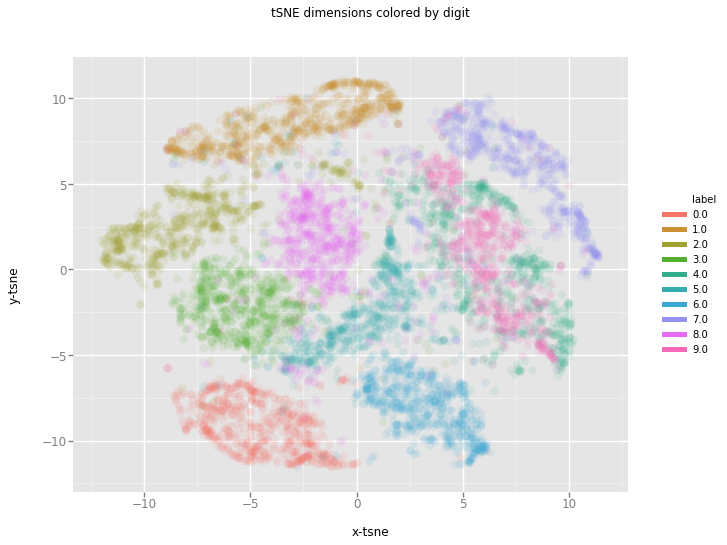

<ggplot: (97442995320)>

In [21]:
from ggplot import *
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

tsne_plot = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
tsne_plot

In [22]:
student_data_mat   = pd.read_csv("E:/pg/bpb/BPB-Publications/Datasets/unsupervised/PCA/student-mat.csv",delimiter=";")
student_data_por   = pd.read_csv("E:/pg/bpb/BPB-Publications/Datasets/unsupervised/PCA/student-por.csv",delimiter=";")
student_data = pd.merge(student_data_mat,student_data_por,how="outer")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [23]:
student_data.isnull().values.any()

False

In [24]:
col_str = student_data.columns[student_data.dtypes == object]

In [25]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
student_data[col_str] = student_data[col_str].apply(lenc.fit_transform)

In [26]:
print(student_data[["G1","G2","G3"]].corr())

          G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000


In [27]:
# Since, G1,G2,G3 have very high correlation, we can drop G1,G2
student_data.drop(axis = 1,labels= ["G1","G2"])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,6
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,15
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,10
5,0,1,16,1,1,1,4,3,3,2,...,1,0,5,4,2,1,2,5,10,15
6,0,1,16,1,1,1,2,2,2,2,...,1,0,4,4,4,1,1,3,0,11
7,0,0,17,1,0,0,4,4,2,4,...,0,0,4,1,4,1,1,1,6,6
8,0,1,15,1,1,0,3,2,3,2,...,1,0,4,2,2,1,1,1,0,19
9,0,1,15,1,0,1,3,4,2,2,...,1,0,5,5,1,1,1,5,0,15


In [28]:
label = student_data["G3"].values
predictors = student_data[student_data.columns[:-1]].values

[  50.     73.64   77.17   80.38   83.02   84.91   86.69   88.42   90.04
   91.41   92.45   93.42   94.27   95.04   95.7    96.22   96.69   97.11
   97.44   97.75   98.05   98.33   98.6    98.85   99.06   99.25   99.43
   99.59   99.74   99.85   99.96  100.04]


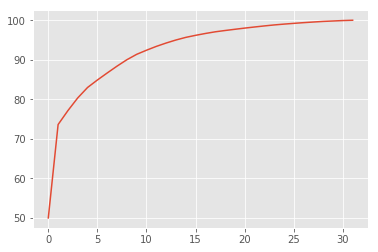

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(student_data.columns)-1)
pca.fit(predictors)
variance_ratio = pca.explained_variance_ratio_
variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)
plt.plot(variance_ratio_cum_sum)
plt.show()

In [30]:
#Looking at above plot I'm taking 10 variables
pca = PCA(n_components=10)
pca.fit(predictors)
Transformed_vector =pca.fit_transform(predictors)
print(Transformed_vector)

[[ 2.52099452  7.58592068 -0.24573629 ..., -1.11645037 -0.57342908
   3.16850849]
 [ 0.5343798   8.88093503 -2.67734523 ..., -0.68779633 -1.0618919
   0.5893296 ]
 [ 6.1399219   4.75465143 -2.12759872 ...,  0.99937067 -0.15591626
  -0.43397275]
 ..., 
 [ 1.4398107  -0.39764959 -2.84003096 ...,  0.030884    2.61725817
  -0.71718168]
 [ 1.89905179  1.76275677  1.36719508 ..., -1.82278783  0.91574951
  -1.52354103]
 [-0.22128344  1.27282063  1.37416422 ..., -0.20201965  1.54591584
  -1.33206264]]


In [31]:
from sklearn import linear_model
clf_rf_pca = linear_model.LinearRegression()
clf_rf_pca.fit(Transformed_vector,label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
from sklearn.model_selection import cross_val_score
score_rf_pca = cross_val_score(clf_rf_pca, Transformed_vector, label, cv=5)
print("Cross Validation score : " + str(score_rf_pca))
print("Cross Validation Mean score : " + str(score_rf_pca.mean()))

Cross Validation score : [ 0.88132873  0.73144133  0.73459806  0.82736291  0.82917798]
Cross Validation Mean score : 0.800781800852


#case study of MNIST data

In [33]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [34]:
train = pd.read_csv("E:/pg/bpb/BPB-Publications/Datasets/regression/MNIST/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
print(train.shape)

(42000, 785)


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [37]:
# save the labels to a Pandas series target
target = train['label']
# Drop the label feature
train = train.drop("label",axis=1)

In [38]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X = train.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

C:\Users\prateek1.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [45]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns

In [46]:
trace1 = go.Scatter(
    x=list(range(784)),
    y= cum_var_exp,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
    line=dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= var_exp,
    mode='lines+markers',
    name="'Individual Explained Variance'",
    line=dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],
                          print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
fig.layout.title = 'Explained Variance plots - Full and Zoomed-in'
fig.layout.xaxis = dict(range=[0, 80], title = 'Feature columns')
fig.layout.yaxis = dict(range=[0, 60], title = 'Explained Variance')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]

With insets:
[ x2,y2 ] over [ (1,1) x1,y1 ]



In [47]:
# Invoke SKlearn's PCA method
n_components = 30
pca = PCA(n_components=n_components).fit(train.values)
eigenvalues = pca.components_.reshape(n_components, 28, 28)
# Extracting the PCA components ( eignevalues )
eigenvalues = pca.components_

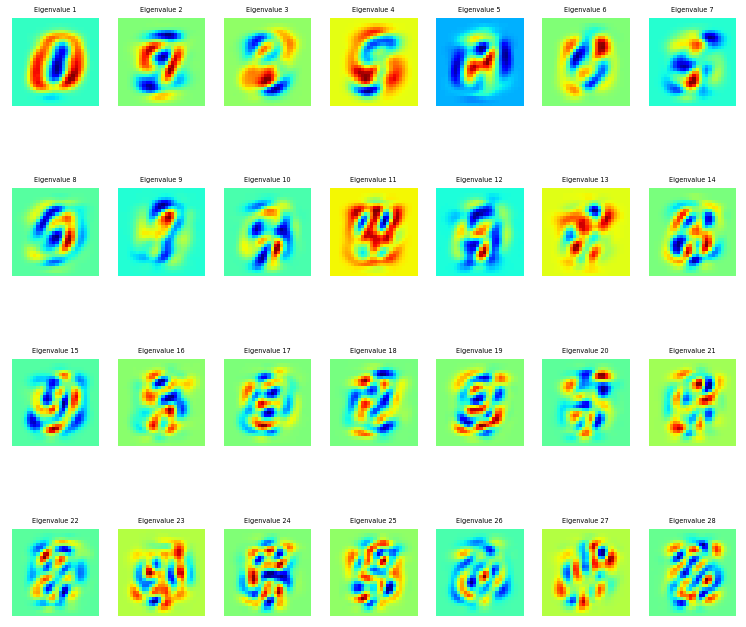

In [48]:
n_row = 4
n_col = 7
# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

In [49]:
# Delete our earlier created X object
del X
# Taking only the first N rows to speed things up
X= train[:6000].values
del train
# Standardising the values
X_std = StandardScaler().fit_transform(X)

# Call the PCA method with 5 components. 
pca = PCA(n_components=5)
pca.fit(X_std)
X_5d = pca.transform(X_std)

# For cluster coloring in our Plotly plots, remember to also restrict the target values 
Target = target[:6000]

C:\Users\prateek1.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [50]:
trace0 = go.Scatter(
    x = X_5d[:,0],
    y = X_5d[:,1],
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]
layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [51]:
from sklearn.cluster import KMeans # KMeans clustering 
# Set a KMeans clustering with 9 components ( 9 chosen sneakily ;)
kmeans = KMeans(n_clusters=9)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X_5d)

trace_Kmeans = go.Scatter(x=X_5d[:, 0], y= X_5d[:, 1], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = X_clustered,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))

In [52]:
layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)
data = [trace_Kmeans]
fig1 = dict(data=data, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig1, filename="svm")